<a href="https://colab.research.google.com/github/Alice1304/Section2_project/blob/main/%EB%9D%BC%EB%B2%A8%EC%9D%B8%EC%BD%94%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

유권자의 개별특성을 바탕으로 국가 선거 투표/미투표 여부 예측 

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/Alice1304/Section2_project/main/train.csv')

In [3]:
df.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1


In [4]:
#결측치 확인 
df.isnull().sum()
#결측치 없음 

index    0
QaA      0
QaE      0
QbA      0
QbE      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 78, dtype: int64

In [5]:
#중복데이터 확인
df.duplicated().sum()
#중복데이터 없음

0

In [6]:
#필요한 컬럼들만 사용하여 학습을 진행합니다

In [7]:
df = df[['age_group','education','engnat','familysize','gender','married','race','religion','urban','voted']]
df

,age_group,education,engnat,familysize,gender,married,race,religion,urban,voted
0,30s,2,1,4,Female,3,White,Other,1,2
1,20s,4,2,3,Female,1,Asian,Hindu,3,2
2,30s,3,1,3,Male,2,White,Other,2,1
3,20s,4,2,0,Female,1,Asian,Hindu,3,1
4,20s,3,1,2,Male,2,White,Agnostic,1,1
...,...,...,...,...,...,...,...,...,...,...
45527,10s,2,1,1,Female,1,White,Jewish,3,2
45528,30s,2,1,2,Male,1,White,Atheist,1,2
45529,10s,2,1,1,Female,1,White,Christian_Other,2,1
45530,40s,4,1,2,Male,1,White,Atheist,0,1


In [8]:
df.nunique()

#familysize= 형제자매수, 27개의 고유값들이 있어 분포를 살펴보려 합니다. 

age_group      7
education      5
engnat         3
familysize    27
gender         2
married        4
race           7
religion      12
urban          4
voted          2
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


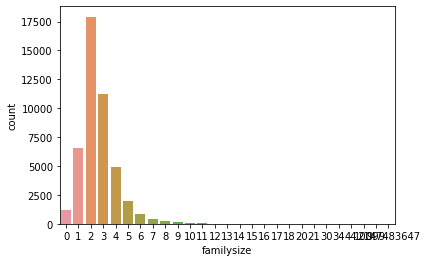

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


x = df['familysize']
x
x.value_counts(normalize=True)
sns.countplot(x);

In [10]:
#familysize의 값 수정  11명 이상은 모두 11명으로 표기 
df.loc[df['familysize']>=11, 'familysize'] = 11

In [11]:
df.nunique()

age_group      7
education      5
engnat         3
familysize    12
gender         2
married        4
race           7
religion      12
urban          4
voted          2
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#평가를 위해 트레인 / 테스트 분리
train, test = train_test_split(df, random_state=2)

In [14]:
train.shape, test.shape 

((34149, 10), (11383, 10))

In [15]:
#타겟을 기준으로 feature / target data 분리 
target = 'voted'
features = df.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [16]:
#분류문제에서는 기준모델을 최빈값으로 설정한다
y_train = train[target]
y_train.value_counts(normalize=True)

2    0.546458
1    0.453542
Name: voted, dtype: float64

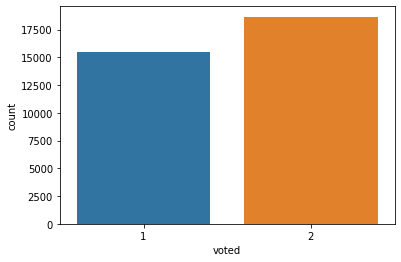

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train);

In [18]:
major = y_train.mode()[0]

In [19]:
y_pred = [major] * len(y_train)

In [20]:
#기준모델 정확도 예측 
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.5464581686140151


다중선형회귀

라벨인코딩/다중선형회귀사용


In [21]:
#문자형 특성을 사용하기 위한 라벨인코딩 진행 

In [22]:
!pip install category_encoders #카테고리 인코더 설치
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.0 MB/s 


In [23]:
X_train_le= X_train.copy()
X_test_le = X_test.copy()

In [24]:
#라벨인코딩 수행 
label = ['age_group', 'gender', 'race', 'religion'] 
for i in label: 
  label_encoder = LabelEncoder() 
  label_encoder.fit(X_train_le[i])
  X_train_le[i]= label_encoder.transform(X_train_le[i]) 
  label_encoder.fit(X_test_le[i])
  X_test_le[i]= label_encoder.transform(X_test_le[i])

In [35]:
#선형회귀 
linear_model = LinearRegression()

#학습
linear_model.fit(X_train_le, y_train)

#예측 
pred = linear_model.predict(X_test_le)

In [36]:
pd.Series(linear_model.coef_, features)

age_group    -0.075120
education    -0.129475
engnat       -0.001713
familysize    0.000112
gender       -0.007717
married      -0.009081
race         -0.031015
religion      0.002143
urban         0.017340
dtype: float64

In [38]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, pred)

In [39]:
display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,0.208216
1,MAE,0.414748
2,RMSE,0.456306
3,R2,0.159416


In [40]:
test_case = [[3, 4, 1, 10, 1, 1, 5, 7, 1]]

In [41]:
linear_model.predict(test_case)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1.29552767])

In [42]:
#평가지표가 매우 낮게 나타나는 것을 확인함
#임의로 테스트 데이터를 넣어봤을 때 정확한 투표여부(1,2)를 알기 어렵다 
#다중선형회귀는 사용하지 않는 것으로 결론

로지스틱회귀

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_le)
X_test_scaled = scaler.transform(X_test_le)

In [45]:
X_train_scaled

array([[ 0.46775451,  0.48204336,  1.61852546, ..., -2.01399814,
         0.73793844,  1.07350171],
       [-0.27481203,  0.48204336,  1.61852546, ..., -2.01399814,
         1.03978017, -0.2344407 ],
       [-1.01737857, -0.57983889, -0.60691446, ...,  0.0585364 ,
        -1.07311189, -0.2344407 ],
       ...,
       [ 2.69545414,  0.48204336, -0.60691446, ...,  0.57667004,
        -0.77127017, -0.2344407 ],
       [ 0.46775451,  0.48204336, -0.60691446, ...,  0.57667004,
         1.94530534, -0.2344407 ],
       [ 1.21032106,  1.5439256 ,  1.61852546, ...,  0.57667004,
        -1.07311189,  1.07350171]])

In [46]:
model = LogisticRegression(random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [47]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.6692436088904506

In [48]:
#로지스틱 회귀 결과 정확도가 기준모델보다 높게 나타남
#but, 원핫인코딩으로 너무 많은 컬럼값들이 생겨서 각 컬럼별로 디테일하게 어떻게 영향을 끼치는지 한 눈에 파악하기 힘듬

랜덤포레스트

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline

In [53]:
pipe_ord = make_pipeline(
    RandomForestClassifier(random_state=10, n_jobs=-1, oob_score=True)
)

pipe_ord.fit(X_train_le, y_train)
print('검증 정확도', pipe_ord.score(X_test_le, y_test))

검증 정확도 0.6542212070631643
